In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros

training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [4]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [5]:
def lenet5_model(input_shape, num_classes):
    model = keras.Sequential([
        # Capa convolucional 1
        layers.Conv2D(6, 5, activation='tanh', input_shape=input_shape),
        layers.AveragePooling2D(2),

        # Capa convolucional 2
        layers.Conv2D(16, 5, activation='tanh'),
        layers.AveragePooling2D(2),

        # Capas completamente conectadas (Dense)
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),

        # Capa de salida
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [6]:

input_shape = (100, 100, 1)  # Tamaño de entrada para LeNet-5
num_classes = 12  # Número de clases
model = lenet5_model(input_shape, num_classes)

/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-11 11:57:56.217651: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Imprimir resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 48, 48, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 22, 22, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       929,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,156 (3.60 MB)

 Trainable params: 943,156 (3.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
Epocas = 50
train_history = model.fit(x_train, y_train, epochs=Epocas, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.1579 - loss: 2.9076 - val_accuracy: 0.0613 - val_loss: 2.5327
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.2561 - loss: 2.2126 - val_accuracy: 0.0613 - val_loss: 2.1255
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.4314 - loss: 1.6809 - val_accuracy: 0.7260 - val_loss: 1.3273
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.7431 - loss: 1.1039 - val_accuracy: 0.8631 - val_loss: 0.8571
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.8617 - loss: 0.7012 - val_accuracy: 0.8199 - val_loss: 0.6643
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.8972 - loss: 0.4753 - val_accuracy: 0.8692 - val_loss: 0.4790
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.9201 - loss: 0.3641 - val_accuracy: 0.9030 - val_loss: 0.3609
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.9317 - loss: 0.3114 - val_accuracy: 0.

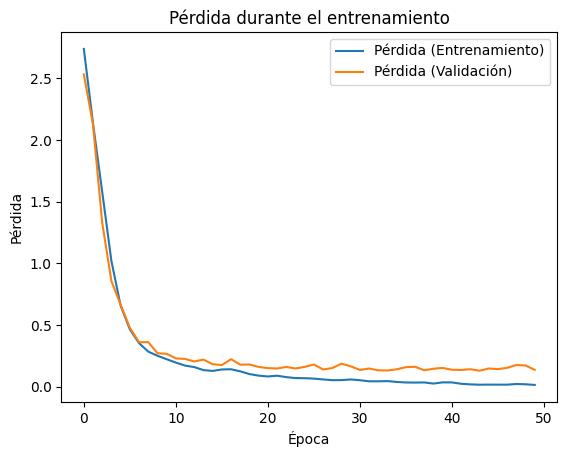

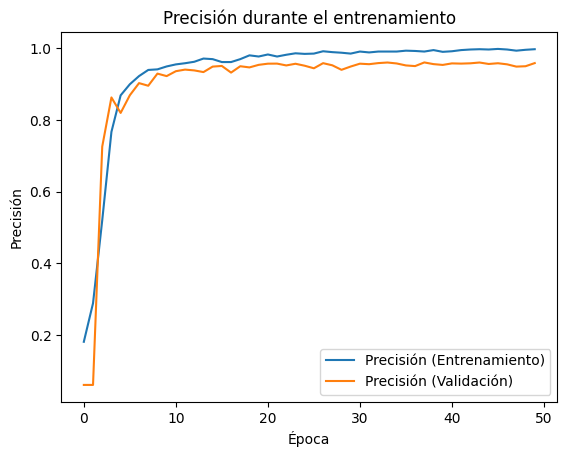

In [10]:
plt.plot(train_history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(train_history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfico de la precisión

plt.plot(train_history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(train_history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()



In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = model.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9566 - loss: 0.1471
Loss: 0.13722111284732819
Accuracy: 0.9588426947593689
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
MCC: 0.9516208683590475
Precisión micro (Prueba): 0.958842705786471
Precisión macro (Prueba): 0.9547894903474416
Precisión ponderada (Prueba): 0.9603352259205208
Precisión por clase (Prueba): [0.83714286 0.98814655 0.96593674 0.94258373 1.         0.99033816
 0.90023202 0.98287671 0.9638009  0.97345133 0.99147727 0.9214876 ]


In [12]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


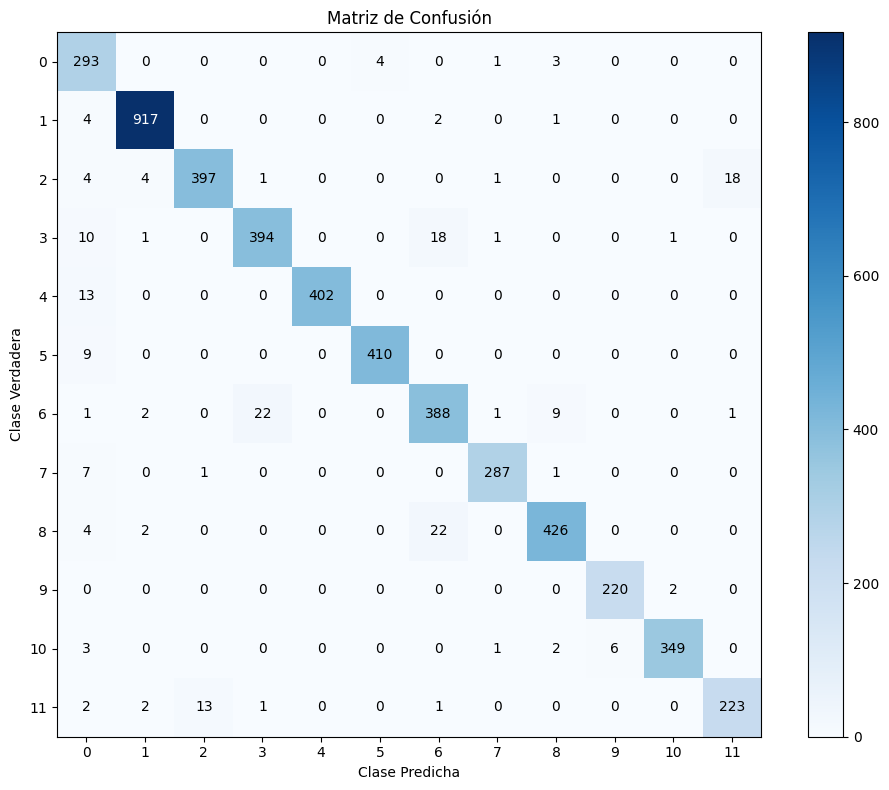

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()